# EMG Dataset [Task]

### All Imports

In [15]:
# imports
import os
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, precision_recall_curve, confusion_matrix
from sklearn.model_selection import cross_val_score
from seaborn import heatmap
import matplotlib.pyplot as plt

print("[+] Imported all required packages")

[+] Imported all required packages


In [2]:
# listing the current directory
print(os.listdir("."))

['feature.joblib', 'info', 'knn_model.joblib', 'labels.joblib', 'main.ipynb', 'main2.ipynb', 'Ninapro_DB1', 'rndf_model.joblib', 'svm_model.joblib', 'test_features.joblib', 'test_labels.joblib', 'train_features.joblib', 'train_labels.joblib']


### Creating a new CSV file with Shuffled Data

In [3]:
# dataset path
dirName = "Ninapro_DB1"
filepath = f"./{dirName}/Ninapro_DB1.csv"
shuffled_data_filepath = f"./{dirName}/shuffled_data.csv"


# Read the entire CSV file and shuffle the data -> to work with SVM
def create_shuffled_data():
    data = pd.read_csv(filepath)
    shuffled_data = data.sample(frac=1, random_state=98)
    shuffled_data.to_csv(shuffled_data_filepath, index=False)
    print(f"[+] Data loaded and shuffled and save to {shuffled_data_filepath}")
    # showing the shuffled data
    shuffled_data.head()


# create_shuffled_data()

### Custom Script for model training

In [5]:
# not required column names
cols = ["Unnamed: 0", "stimulus", "restimulus",
        "repetition", "rerepetition", "subject"]

# Models
KNN = KNeighborsClassifier(n_neighbors=5,
                           weights="distance",
                           algorithm="auto",
                           leaf_size=50)

SVM = SVC(kernel="linear", C=1)

RNDF = RandomForestClassifier(n_estimators=100,
                              criterion="log_loss")

# Variables
_X = pd.DataFrame()
_y = pd.Series()
_X_train = pd.DataFrame()
_y_train = pd.Series()
_X_test = pd.DataFrame()
_y_test = pd.Series()


# start script
def _start_(model_name, shuffled_data, chunk_size,  concat: bool = False):
    global _X, _y, _X_train, _y_train, _X_test, _y_test

    print(f"\n[+] Training {model_name}")

    # helper function
    def _concat_(_A, a):
        if _A is None:
            _A = a
        else:
            _A = pd.concat([_A, a], ignore_index=True)
        return _A

    # creating the chunk reader
    csv_chunk_reader = pd.read_csv(filepath_or_buffer=shuffled_data,
                                   chunksize=int(chunk_size),
                                   na_filter=False)

    # reading chunk-by-chunk
    for chunk in csv_chunk_reader:
        print("\n[*] Running on new chunk")
        # dropping the columns
        chunk.drop(cols, axis=1, inplace=True)

        # features / labels
        X = chunk.iloc[:, :-1]
        y = chunk.iloc[:, -1]
        print("features:", X.shape)
        print("label:", y.shape)
        print(y.value_counts(sort=True, ascending=True, dropna=False))

        # checking for unique labels
        unique_classes_chunk = unique_labels(y)

        if len(unique_classes_chunk) < 2:
            print("[-] Skipping chunk with only one class.")
            continue

        # train-test splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.2,
                                                            train_size=0.8,
                                                            shuffle=True,
                                                            random_state=98)
        print("Splitted into train(80%) and test (20%)")
        print("X_train:", X_train.shape)
        print("y_train:", y_train.shape)
        print("X_test:", X_test.shape)
        print("y_test:", y_test.shape)

        # fitting into the model
        model_name.fit(X_train, y_train)
        print(f"[+] Fitted model {model_name}")

        # concatenating the features and labels
        if concat:
            _X = _concat_(_X, X)
            _y = _concat_(_y, y)
            _X_train = _concat_(_X_train, X_train)
            _y_train = _concat_(_y_train, y_train)
            _X_test = _concat_(_X_test, X_test)
            _y_test = _concat_(_y_test, y_test)
            print("[+] Concatenated Chunk")

    print(f"\n[+] {model_name} trained successfully")

In [6]:
# save the model(s) to the file(s)
def save_model(_name, file_name: str = "1.joblib"):
    joblib.dump(_name, filename=file_name)
    print(f"[+] {_name} saved to {file_name}")

### Set Chunk Size

In [7]:
CHUNK_SIZE = 1e6

### Training

#### Training KNN

In [8]:
# starting the training process
_start_(model_name=KNN,
        shuffled_data=shuffled_data_filepath,
        chunk_size=CHUNK_SIZE,
        concat=True)

save_model(KNN, "knn_model.joblib")


[+] Training KNeighborsClassifier(leaf_size=50, weights='distance')

[*] Running on new chunk
features: (1000000, 32)
label: (1000000,)
exercise
1    218071
2    307738
3    474191
Name: count, dtype: int64
Splitted into train(80%) and test (20%)
X_train: (800000, 32)
y_train: (800000,)
X_test: (200000, 32)
y_test: (200000,)
[+] Fitted model KNeighborsClassifier(leaf_size=50, weights='distance')
[+] Concatenated Chunk

[*] Running on new chunk
features: (1000000, 32)
label: (1000000,)
exercise
1    217072
2    308011
3    474917
Name: count, dtype: int64
Splitted into train(80%) and test (20%)
X_train: (800000, 32)
y_train: (800000,)
X_test: (200000, 32)
y_test: (200000,)
[+] Fitted model KNeighborsClassifier(leaf_size=50, weights='distance')
[+] Concatenated Chunk

[*] Running on new chunk
features: (1000000, 32)
label: (1000000,)
exercise
1    217944
2    308213
3    473843
Name: count, dtype: int64
Splitted into train(80%) and test (20%)
X_train: (800000, 32)
y_train: (800000,)
X_t

#### Saving the variables

In [9]:
# info
print("features:", _X.shape)
print("labels:", _y.shape)
print("features:", _X_train.shape)
print("labels:", _y_train.shape)
print("test features:", _X_test.shape)
print("test labels:", _y_test.shape)

# saving the variables
joblib.dump(_X, "feature.joblib")
joblib.dump(_y, "labels.joblib")
joblib.dump(_X_train, "train_features.joblib")
joblib.dump(_y_train, "train_labels.joblib")
joblib.dump(_X_test, "test_features.joblib")
joblib.dump(_y_test, "test_labels.joblib")

features: (12553611, 32)
labels: (12553611,)
features: (10042888, 32)
labels: (10042888,)
test features: (2510723, 32)
test labels: (2510723,)


['test_labels.joblib']

In [22]:
_X = joblib.load(filename="./feature.joblib")
_y = joblib.load(filename="./labels.joblib")

_X_train = joblib.load(filename="./train_feature.joblib")
_y_train = joblib.load(filename="./train_labels.joblib")

_X_test = joblib.load(filename="./test_features.joblib")
_y_test = joblib.load(filename="./test_labels.joblib")

#### Predictions KNN

In [11]:
# predictions
KNN = joblib.load(filename="./knn_model.joblib")

knn_predicts = KNN.predict(_X_test)
print("KNN predictions:", knn_predicts)

KNN predictions: [3 3 1 ... 2 1 3]


#### Training Random Forest

In [ ]:
_start_(model_name=RNDF,
        shuffled_data=shuffled_data_filepath,
        chunk_size=CHUNK_SIZE,
        concat=False)

save_model(RNDF, "rndf_model.joblib")

#### Predictions Random Forest

In [20]:
# predictions
RNDF = joblib.load(filename="./rndf_model.joblib")

rndf_predicts = RNDF.predict(_X_test)
print("Random Forest predictions:", rndf_predicts)

Random Forest predictions: [3 3 1 ... 2 1 3]


#### Training SVM

In [ ]:
_start_(model_name=SVM,
        shuffled_data=shuffled_data_filepath,
        chunk_size=CHUNK_SIZE,
        concat=False)

save_model(SVM, "svm_model.joblib")

#### Predictions SVM

In [ ]:
# predictions
SVM = joblib.load(filename="./svm_model.joblib")

svm_predicts = SVM.predict(_X_test)
print("SVM predictions:", svm_predicts)

### Performance Measures / Evaluation of Model(s)

In [18]:
# accuracies
def calc_cross_val_score(classifier, X, y):
    accuracies = cross_val_score(estimator=classifier, X=X, y=y, cv=10)
    print("Mean:", accuracies.mean())
    print("Standard deviation:", accuracies.std())


# performance measures
def measure_performance(yTrue, yPred):
    accuracy = accuracy_score(y_true=yTrue, y_pred=yPred)
    print("Accuracy:\n", accuracy)

    precision = precision_score(y_true=yTrue, y_pred=yPred, average="weighted")
    print("Precision:\n", precision)

    recall = recall_score(y_true=yTrue, y_pred=yPred, average="weighted")
    print("Recall:\n", recall)

    f1 = f1_score(y_true=yTrue, y_pred=yPred, average="weighted")
    print("f1 Score:\n", f1)

    cm = confusion_matrix(y_true=yTrue, y_pred=yPred)
    heatmap(cm, annot=True, fmt='d', cmap="Blues")
    print("Confusion matrix:\n", cm)

#### KNN Evaluation

In [23]:
calc_cross_val_score(KNN, _X, _y)

Accuracy:
 0.9966850186181431
Precision:
 0.9966859806647965
Recall:
 0.9966850186181431
f1 Score:
 0.9966833375429903
Confusion matrix:
 [[ 545623     970     183]
 [   2550  767480    3140]
 [    127    1353 1189297]]


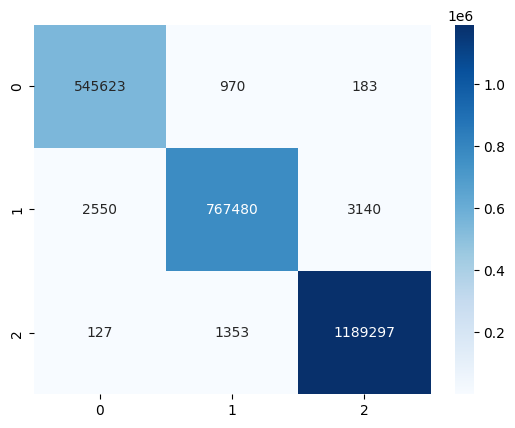

In [19]:
measure_performance(_y_test, knn_predicts)

#### Random Forest Evaluation

In [ ]:
calc_cross_val_score(RNDF, _X, _y)

Accuracy:
 0.9955379386734419
Precision:
 0.9955403954719293
Recall:
 0.9955379386734419
f1 Score:
 0.9955354814090122
Confusion matrix:
 [[ 544322    1924     530]
 [   1196  766116    5858]
 [    116    1579 1189082]]


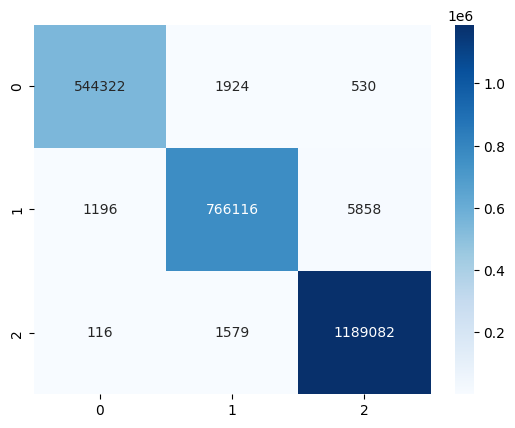

In [21]:
measure_performance(_y_test, rndf_predicts)

#### SVM Evaluation

In [ ]:
# calc_cross_val_score(SVM, _X, _y)
measure_performance(_y_test, svm_predicts)